In [60]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
 
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
parameters = {
  'start':'1',
  'limit':'10', # default was 5000, we are using 10 for readability and speed
  'convert':'USD'
} # doing so (pro) because "All requests should target domain" in API documentation
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '602600a9-6d5e-4bd2-b69a-a6672fed0ac4', 
} # use your own API key

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10" into the Anaconda Prompt to change this to allow to pull data

{'status': {'timestamp': '2024-05-15T08:14:02.453Z', 'error_code': 0, 'error_message': None, 'elapsed': 26, 'credit_count': 1, 'notice': None, 'total_count': 9939}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11045, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [61]:
type(data)

dict

In [62]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.json_normalize(data['data']) # normalizes data in a df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,11045,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00,19698550.00,19698550.00,False,NaN,1,NaN,NaN,None,2024-05-15T08:12:00.000Z,62131.81,24178317189.27,-12.74,0.31,0.41,0.05,-6.22,-10.38,20.00,1223906496702.26,54.01,1304767936256.60,None,2024-05-15T08:12:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,8926,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120116737.02,120116737.02,True,NaN,2,NaN,NaN,None,2024-05-15T08:12:00.000Z,2912.26,11373112140.44,-4.09,0.29,-0.12,-2.60,-10.28,-22.00,5.04,349811492597.68,15.44,349811492597.68,None,2024-05-15T08:12:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether USDt,USDT,tether,85496,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,110846923650.04,113086550460.85,True,NaN,3,NaN,NaN,None,2024-05-15T08:12:00.000Z,1.00,51631367091.66,0.98,-0.02,0.03,-0.01,-0.13,0.01,-0.09,110816609039.42,4.89,113055623353.18,None,2024-05-15T08:12:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,2159,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147586653.65,147586653.65,False,NaN,4,NaN,NaN,None,2024-05-15T08:12:00.000Z,568.82,1959223300.28,31.78,-0.03,-3.17,-1.87,-1.39,-7.19,65.13,83949864837.69,3.70,83949864837.69,None,2024-05-15T08:12:00.000Z,NaN,NaN,NaN,NaN,NaN
4,5426,Solana,SOL,solana,660,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,448659207.04,576012444.44,True,NaN,5,NaN,NaN,None,2024-05-15T08:12:00.000Z,144.30,2345501082.77,3.16,0.31,-1.19,-1.19,-6.61,-25.49,25.57,64740580514.10,2.86,83117384980.78,None,2024-05-15T08:12:00.000Z,NaN,NaN,NaN,NaN,NaN
5,3408,USDC,USDC,usd-coin,19095,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32897853976.76,32897853976.76,False,NaN,6,NaN,NaN,None,2024-05-15T08:12:00.000Z,1.00,5183220593.08,-1.88,-0.02,0.00,0.01,-0.00,0.00,0.03,32897881098.04,1.45,32897881098.04,None,2024-05-15T08:12:00.000Z,1027.00,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
6,52,XRP,XRP,xrp,1316,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00,55359176420.00,99987633657.00,False,NaN,7,NaN,NaN,None,2024-05-15T08:13:00.000Z,0.50,1013012177.73,20.69,0.18,-0.82,-3.75,-2.42,-21.67,-8.59,27732512280.08,1.22,50095601259.81,None,2024-05-15T08:13:00.000Z,NaN,NaN,NaN,NaN,NaN
7,11419,Toncoin,TON,toncoin,323,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3474141028.04,5106623479.64,True,NaN,8,3414166606.00,23757763193.55,None,2024-05-15T08:12:00.000Z,6.96,406559786.93,-37.18,-0.34,-1.40,23.42,-2.09,82.43,215.27,24175100213.39,1.07,35534865561.22,None,2024-05-15T08:12:00.000Z,NaN,NaN,NaN,NaN,NaN
8,74,Dogecoin,DOGE,dogecoin,965,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,144297716383.71,144297716383.71,True,NaN,9,NaN,NaN,None,2024-05-15T08:12:00.000Z,0.15,1654518317.55,-18.11,1.37,-1.43,1.23,-9.94,-8.26,75.10,21568028799.77,0.95,21568028799.77,None,2024-05-15T08:12:00.000Z,NaN,NaN,NaN,NaN,NaN
9,2010,Cardano,ADA,cardano,1170,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00,35670897505.36,36883631806.18,False,NaN,10,NaN,Na

In [63]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.Timestamp.now()
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11045,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00,19698550.00,19698550.00,False,NaN,1,NaN,NaN,None,2024-05-15T08:12:00.000Z,62131.81,24178317189.27,-12.74,0.31,0.41,0.05,-6.22,-10.38,20.00,1223906496702.26,54.01,1304767936256.60,None,2024-05-15T08:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 13:44:14.490397
1,1027,Ethereum,ETH,ethereum,8926,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120116737.02,120116737.02,True,NaN,2,NaN,NaN,None,2024-05-15T08:12:00.000Z,2912.26,11373112140.44,-4.09,0.29,-0.12,-2.60,-10.28,-22.00,5.04,349811492597.68,15.44,349811492597.68,None,2024-05-15T08:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 13:44:14.490397
2,825,Tether USDt,USDT,tether,85496,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,110846923650.04,113086550460.85,True,NaN,3,NaN,NaN,None,2024-05-15T08:12:00.000Z,1.00,51631367091.66,0.98,-0.02,0.03,-0.01,-0.13,0.01,-0.09,110816609039.42,4.89,113055623353.18,None,2024-05-15T08:12:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-15 13:44:14.490397
3,1839,BNB,BNB,bnb,2159,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147586653.65,147586653.65,False,NaN,4,NaN,NaN,None,2024-05-15T08:12:00.000Z,568.82,1959223300.28,31.78,-0.03,-3.17,-1.87,-1.39,-7.19,65.13,83949864837.69,3.70,83949864837.69,None,2024-05-15T08:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 13:44:14.490397
4,5426,Solana,SOL,solana,660,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,448659207.04,576012444.44,True,NaN,5,NaN,NaN,None,2024-05-15T08:12:00.000Z,144.30,2345501082.77,3.16,0.31,-1.19,-1.19,-6.61,-25.49,25.57,64740580514.10,2.86,83117384980.78,None,2024-05-15T08:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 13:44:14.490397
5,3408,USDC,USDC,usd-coin,19095,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32897853976.76,32897853976.76,False,NaN,6,NaN,NaN,None,2024-05-15T08:12:00.000Z,1.00,5183220593.08,-1.88,-0.02,0.00,0.01,-0.00,0.00,0.03,32897881098.04,1.45,32897881098.04,None,2024-05-15T08:12:00.000Z,1027.00,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-15 13:44:14.490397
6,52,XRP,XRP,xrp,1316,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00,55359176420.00,99987633657.00,False,NaN,7,NaN,NaN,None,2024-05-15T08:13:00.000Z,0.50,1013012177.73,20.69,0.18,-0.82,-3.75,-2.42,-21.67,-8.59,27732512280.08,1.22,50095601259.81,None,2024-05-15T08:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 13:44:14.490397
7,11419,Toncoin,TON,toncoin,323,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3474141028.04,5106623479.64,True,NaN,8,3414166606.00,23757763193.55,None,2024-05-15T08:12:00.000Z,6.96,406559786.93,-37.18,-0.34,-1.40,23.42,-2.09,82.43,215.27,24175100213.39,1.07,35534865561.22,None,2024-05-15T08:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 13:44:14.490397
8,74,Dogecoin,DOGE,dogecoin,965,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,144297716383.71,144297716383.71,True,NaN,9,NaN,NaN,None,2024-05-15T08:12:00.000Z,0.15,1654518317.55,-18.11,1.37,-1.43,1.23,-9.94,-8.26,75.10,21568028799.77,0.95,21568028799.

In [64]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
      'start':'1',
      'limit':'10', 
      'convert':'USD'
    } 
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '602600a9-6d5e-4bd2-b69a-a6672fed0ac4', 
    } 
    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.Timestamp.now()
    df 
    
    if not os.path.isfile(r'C:\Users\ARJUN\Python_projects\API.csv'):
        df.to_csv(r'C:\Users\ARJUN\Python_projects\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\ARJUN\Python_projects\API.csv', mode = 'a', header = False) # mode = 'a' means append

In [65]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print("API Runner completed successfully")
    sleep(60) # sleep for 60 seconds

{'status': {'timestamp': '2024-05-15T08:14:44.750Z', 'error_code': 0, 'error_message': None, 'elapsed': 10, 'credit_count': 1, 'notice': None, 'total_count': 9939}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11045, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

{'status': {'timestamp': '2024-05-15T08:15:47.333Z', 'error_code': 0, 'error_message': None, 'elapsed': 20, 'credit_count': 1, 'notice': None, 'total_count': 9939}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11045, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [66]:
df3 = pd.read_csv(r'C:\Users\ARJUN\Python_projects\API.csv')
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11045,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00,19698550.00,19698550.00,False,NaN,1,NaN,NaN,NaN,2024-05-15T08:12:00.000Z,62131.81,24178317189.27,-12.74,0.31,0.41,0.05,-6.22,-10.38,20.00,1223906496702.26,54.01,1304767936256.60,NaN,2024-05-15T08:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 13:44:44.594335
1,1,1027,Ethereum,ETH,ethereum,8926,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120116737.02,120116737.02,True,NaN,2,NaN,NaN,NaN,2024-05-15T08:12:00.000Z,2912.26,11373112140.44,-4.09,0.29,-0.12,-2.60,-10.28,-22.00,5.04,349811492597.68,15.44,349811492597.68,NaN,2024-05-15T08:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 13:44:44.594335
2,2,825,Tether USDt,USDT,tether,85496,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,110846923650.04,113086550460.85,True,NaN,3,NaN,NaN,NaN,2024-05-15T08:12:00.000Z,1.00,51631367091.66,0.98,-0.02,0.03,-0.01,-0.13,0.01,-0.09,110816609039.42,4.89,113055623353.18,NaN,2024-05-15T08:12:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-15 13:44:44.594335
3,3,1839,BNB,BNB,bnb,2159,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,147586653.65,147586653.65,False,NaN,4,NaN,NaN,NaN,2024-05-15T08:12:00.000Z,568.82,1959223300.28,31.78,-0.03,-3.17,-1.87,-1.39,-7.19,65.13,83949864837.69,3.70,83949864837.69,NaN,2024-05-15T08:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 13:44:44.594335
4,4,5426,Solana,SOL,solana,660,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,448659207.04,576012444.44,True,NaN,5,NaN,NaN,NaN,2024-05-15T08:12:00.000Z,144.30,2345501082.77,3.16,0.31,-1.19,-1.19,-6.61,-25.49,25.57,64740580514.10,2.86,83117384980.78,NaN,2024-05-15T08:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 13:44:44.594335
5,5,3408,USDC,USDC,usd-coin,19095,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,32897853976.76,32897853976.76,False,NaN,6,NaN,NaN,NaN,2024-05-15T08:12:00.000Z,1.00,5183220593.08,-1.88,-0.02,0.00,0.01,-0.00,0.00,0.03,32897881098.04,1.45,32897881098.04,NaN,2024-05-15T08:12:00.000Z,1027.00,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-15 13:44:44.594335
6,6,52,XRP,XRP,xrp,1316,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00,55359176420.00,99987633657.00,False,NaN,7,NaN,NaN,NaN,2024-05-15T08:13:00.000Z,0.50,1013012177.73,20.69,0.18,-0.82,-3.75,-2.42,-21.67,-8.59,27732512280.08,1.22,50095601259.81,NaN,2024-05-15T08:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 13:44:44.594335
7,7,11419,Toncoin,TON,toncoin,323,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,3474141028.04,5106623479.64,True,NaN,8,3414166606.00,23757763193.55,NaN,2024-05-15T08:12:00.000Z,6.96,406559786.93,-37.18,-0.34,-1.40,23.42,-2.09,82.43,215.27,24175100213.39,1.07,35534865561.22,NaN,2024-05-15T08:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 13:44:44.594335
8,8,74,Dogecoin,DOGE,dogecoin,965,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,144297716383.71,144297716383.71,True,NaN,9,NaN,NaN,NaN,2024-05-15T08:12:00.000Z,0.15,1654518317.55,-18.11,1.37,-1.43,1.23,-9.94,-8.26,75.10,21568028799.77,0.95,

In [67]:
pd.set_option('display.float_format', lambda x : '%.2f' % x)

In [68]:
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11045,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00,19698550.00,19698550.00,False,NaN,1,NaN,NaN,NaN,2024-05-15T08:12:00.000Z,62131.81,24178317189.27,-12.74,0.31,0.41,0.05,-6.22,-10.38,20.00,1223906496702.26,54.01,1304767936256.60,NaN,2024-05-15T08:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 13:44:44.594335
1,1,1027,Ethereum,ETH,ethereum,8926,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120116737.02,120116737.02,True,NaN,2,NaN,NaN,NaN,2024-05-15T08:12:00.000Z,2912.26,11373112140.44,-4.09,0.29,-0.12,-2.60,-10.28,-22.00,5.04,349811492597.68,15.44,349811492597.68,NaN,2024-05-15T08:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 13:44:44.594335
2,2,825,Tether USDt,USDT,tether,85496,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,110846923650.04,113086550460.85,True,NaN,3,NaN,NaN,NaN,2024-05-15T08:12:00.000Z,1.00,51631367091.66,0.98,-0.02,0.03,-0.01,-0.13,0.01,-0.09,110816609039.42,4.89,113055623353.18,NaN,2024-05-15T08:12:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-15 13:44:44.594335
3,3,1839,BNB,BNB,bnb,2159,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,147586653.65,147586653.65,False,NaN,4,NaN,NaN,NaN,2024-05-15T08:12:00.000Z,568.82,1959223300.28,31.78,-0.03,-3.17,-1.87,-1.39,-7.19,65.13,83949864837.69,3.70,83949864837.69,NaN,2024-05-15T08:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 13:44:44.594335
4,4,5426,Solana,SOL,solana,660,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,448659207.04,576012444.44,True,NaN,5,NaN,NaN,NaN,2024-05-15T08:12:00.000Z,144.30,2345501082.77,3.16,0.31,-1.19,-1.19,-6.61,-25.49,25.57,64740580514.10,2.86,83117384980.78,NaN,2024-05-15T08:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 13:44:44.594335
5,5,3408,USDC,USDC,usd-coin,19095,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,32897853976.76,32897853976.76,False,NaN,6,NaN,NaN,NaN,2024-05-15T08:12:00.000Z,1.00,5183220593.08,-1.88,-0.02,0.00,0.01,-0.00,0.00,0.03,32897881098.04,1.45,32897881098.04,NaN,2024-05-15T08:12:00.000Z,1027.00,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-15 13:44:44.594335
6,6,52,XRP,XRP,xrp,1316,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00,55359176420.00,99987633657.00,False,NaN,7,NaN,NaN,NaN,2024-05-15T08:13:00.000Z,0.50,1013012177.73,20.69,0.18,-0.82,-3.75,-2.42,-21.67,-8.59,27732512280.08,1.22,50095601259.81,NaN,2024-05-15T08:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 13:44:44.594335
7,7,11419,Toncoin,TON,toncoin,323,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,3474141028.04,5106623479.64,True,NaN,8,3414166606.00,23757763193.55,NaN,2024-05-15T08:12:00.000Z,6.96,406559786.93,-37.18,-0.34,-1.40,23.42,-2.09,82.43,215.27,24175100213.39,1.07,35534865561.22,NaN,2024-05-15T08:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 13:44:44.594335
8,8,74,Dogecoin,DOGE,dogecoin,965,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,144297716383.71,144297716383.71,True,NaN,9,NaN,NaN,NaN,2024-05-15T08:12:00.000Z,0.15,1654518317.55,-18.11,1.37,-1.43,1.23,-9.94,-8.26,75.10,21568028799.77,0.95,

In [71]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.34,0.44,-0.06,-6.14,-10.35,19.92
Ethereum,0.29,-0.14,-2.70,-10.24,-21.98,5.07
Tether USDt,-0.00,0.04,-0.01,-0.11,0.02,-0.10
BNB,-0.01,-3.21,-1.93,-1.27,-7.31,65.10
Solana,0.47,-1.23,-1.24,-6.38,-25.44,25.56
USDC,-0.01,0.00,0.01,0.01,0.01,0.02
XRP,0.17,-0.82,-3.77,-2.40,-21.67,-8.60
Toncoin,-0.44,-1.29,23.48,-1.86,82.23,215.46
Dogecoin,1.36,-1.48,1.07,-9.68,-8.44,75.01


In [72]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.34
             quote.USD.percent_change_24h     0.44
             quote.USD.percent_change_7d     -0.06
             quote.USD.percent_change_30d    -6.14
             quote.USD.percent_change_60d   -10.35
             quote.USD.percent_change_90d    19.92
Ethereum     quote.USD.percent_change_1h      0.29
             quote.USD.percent_change_24h    -0.14
             quote.USD.percent_change_7d     -2.70
             quote.USD.percent_change_30d   -10.24
             quote.USD.percent_change_60d   -21.98
             quote.USD.percent_change_90d     5.07
Tether USDt  quote.USD.percent_change_1h     -0.00
             quote.USD.percent_change_24h     0.04
             quote.USD.percent_change_7d     -0.01
             quote.USD.percent_change_30d    -0.11
             quote.USD.percent_change_60d     0.02
             quote.USD.percent_change_90d    -0.10
BNB          quote.USD.percent_change_1h

In [73]:
type(df3)

pandas.core.frame.DataFrame

In [74]:
type(df4)

pandas.core.series.Series

In [75]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                            
Bitcoin     quote.USD.percent_change_1h     0.34
            quote.USD.percent_change_24h    0.44
            quote.USD.percent_change_7d    -0.06
            quote.USD.percent_change_30d   -6.14
            quote.USD.percent_change_60d  -10.35
            quote.USD.percent_change_90d   19.92
Ethereum    quote.USD.percent_change_1h     0.29
            quote.USD.percent_change_24h   -0.14
            quote.USD.percent_change_7d    -2.70
            quote.USD.percent_change_30d  -10.24
            quote.USD.percent_change_60d  -21.98
            quote.USD.percent_change_90d    5.07
Tether USDt quote.USD.percent_change_1h    -0.00
            quote.USD.percent_change_24h    0.04
            quote.USD.percent_change_7d    -0.01
            quote.USD.percent_change_30d   -0.11
            quote.USD.percent_change_60d    0.02
            quote.USD.percent_change_90d   -0.10
BNB         quote.USD.percent_change_1h    -0.01
            quote.USD.percent_change_24h   -3.21
            quote.USD.percent_change_7d    -1.93
            quote.USD.percent_change_30d   -1.27
            quote.USD.percent_change_60d   -7.31
            quote.USD.percent_change_90d   65.10
Solana      quote.USD.percent_change_1h     0.47
            quote.USD.percent_change_24h   -1.23
            quote.USD.percent_change_7d    -1.24
            quote.USD.percent_change_30d   -6.38
            quote.USD.percent_change_60d  -25.44
            quote.USD.percent_change_90d   25.56
USDC        quote.USD.percent_change_1h    -0.01
            quote.USD.percent_change_24h    0.00
            quote.USD.percent_change_7d     0.01
            quote.USD.percent_change_30d    0.01
            quote.USD.percent_change_60d    0.01
            quote.USD.percent_change_90d    0.02
XRP         quote.USD.percent_change_1h     0.17
            quote.USD.percent_change_24h   -0.82
            quote.USD.percent_change_7d    -3.77
            quote.USD.percent_change_30d   -2.40
            quote.USD.percent_change_60d  -21.67
            quote.USD.percent_change_90d   -8.60
Toncoin     quote.USD.percent_change_1h    -0.44
            quote.USD.percent_change_24h   -1.29
            quote.USD.percent_change_7d    23.48
            quote.USD.percent_change_30d   -1.86
            quote.USD.percent_change_60d   82.23
            quote.USD.percent_change_90d  215.46
Dogecoin    quote.USD.percent_change_1h     1.36
            quote.USD.percent_change_24h   -1.48
            quote.USD.percent_change_7d     1.07
            quote.USD.percent_change_30d   -9.68
            quote.USD.percent_change_60d   -8.44
            quote.USD.percent_change_90d   75.01
Cardano     quote.USD.percent_change_1h     0.87
            quote.USD.percent_change_24h   -1.12
            quote.USD.percent_change_7d    -1.50
            quote.USD.percent_change_30d  -11.98
            quote.USD.percent_change_60d  -41.00
            quote.USD.percent_change_90d  -24.96

In [76]:
df5.count()

values    60
dtype: int64

In [77]:
index = pd.Index(range(60))
df6 = df5.set_index(index)
df6

,values
0,0.34
1,0.44
2,-0.06
3,-6.14
4,-10.35
5,19.92
6,0.29
7,-0.14
8,-2.70
9,-10.24


In [78]:
index = pd.Index(range(60))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.34
1,Bitcoin,quote.USD.percent_change_24h,0.44
2,Bitcoin,quote.USD.percent_change_7d,-0.06
3,Bitcoin,quote.USD.percent_change_30d,-6.14
4,Bitcoin,quote.USD.percent_change_60d,-10.35
5,Bitcoin,quote.USD.percent_change_90d,19.92
6,Ethereum,quote.USD.percent_change_1h,0.29
7,Ethereum,quote.USD.percent_change_24h,-0.14
8,Ethereum,quote.USD.percent_change_7d,-2.70
9,Ethereum,quote.USD.percent_change_30d,-10.24


In [79]:
df7 = df6.rename(columns = {'level_1' : '%_change'})
df7

,name,%_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.34
1,Bitcoin,quote.USD.percent_change_24h,0.44
2,Bitcoin,quote.USD.percent_change_7d,-0.06
3,Bitcoin,quote.USD.percent_change_30d,-6.14
4,Bitcoin,quote.USD.percent_change_60d,-10.35
5,Bitcoin,quote.USD.percent_change_90d,19.92
6,Ethereum,quote.USD.percent_change_1h,0.29
7,Ethereum,quote.USD.percent_change_24h,-0.14
8,Ethereum,quote.USD.percent_change_7d,-2.70
9,Ethereum,quote.USD.percent_change_30d,-10.24


In [80]:
df7['%_change'] = df7['%_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])
df7

,name,%_change,values
0,Bitcoin,1h,0.34
1,Bitcoin,24h,0.44
2,Bitcoin,7d,-0.06
3,Bitcoin,30d,-6.14
4,Bitcoin,60d,-10.35
5,Bitcoin,90d,19.92
6,Ethereum,1h,0.29
7,Ethereum,24h,-0.14
8,Ethereum,7d,-2.70
9,Ethereum,30d,-10.24


In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

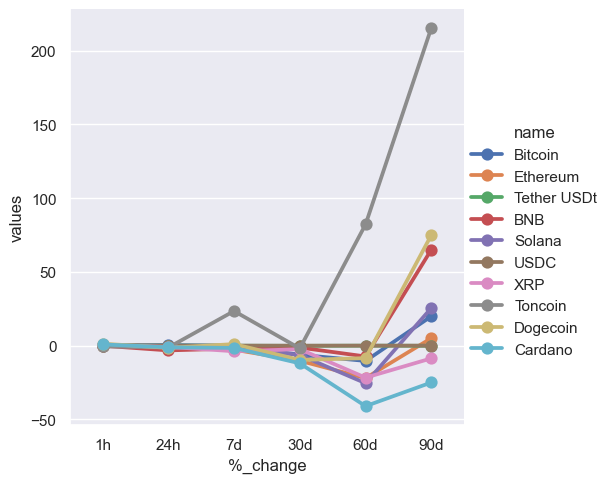

In [82]:
sns.catplot(x = '%_change', y = 'values', hue = 'name', data = df7, kind = 'point')

In [69]:
df8 = df3[['name', 'quote.USD.price', 'timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,62131.81,2024-05-15 13:44:44.594335
10,Bitcoin,62125.20,2024-05-15 13:45:47.176551


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

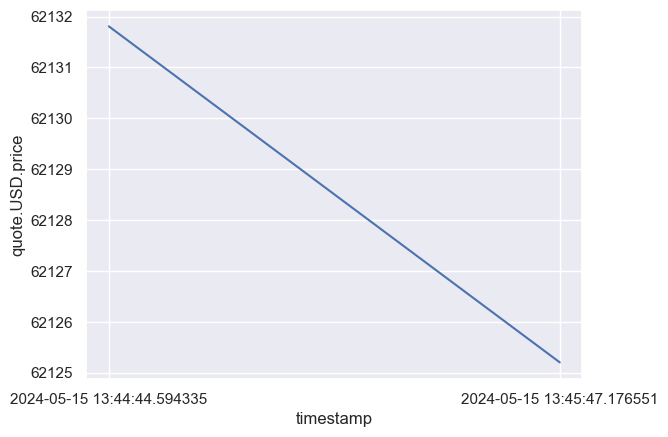

In [70]:
sns.set_theme(style = 'darkgrid')
sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df8)